# Project : Finding Best Customer

In [1]:
#importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score

In [2]:
#import the online_retail dataset
dataset = pd.read_csv('Online+Retail.csv' ,  sep = ',' , encoding = "ISO-8859-1" , header= 0)

In [3]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [4]:
#Change date format
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'] , infer_datetime_format=True)

In [5]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [6]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Missing value

Though there is many missing value,but we cannot import them because it is on ID column.We cannot import unnecessary value on id column,becuse ID is unique for everyone.
So simply we remove all those rows.

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


### Extracting R(Recency), F(Frequency), M(Monetary) columns form the data that we imported in.

### Monetary Value

In [13]:
# Extracting amount by multiplying quantity and unit price and saving the data into amount variable.
amount =pd.DataFrame(dataset.Quantity * dataset.UnitPrice , columns = ['Amount'])
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [14]:
#merging amount in order_wise
dataset = pd.concat(objs = [dataset , amount] , axis = 1 , ignore_index = False)

# Finding total amount spent per customer
monetary = dataset.groupby('CustomerID').Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Frequency Value

In [15]:
frequency = dataset[['CustomerID' , 'InvoiceNo']]

In [16]:
frequency.head()

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536365
2,17850.0,536365
3,17850.0,536365
4,17850.0,536365


In [17]:
k = pd.DataFrame(frequency.groupby('CustomerID').InvoiceNo.count())
k.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17


In [18]:
k = pd.DataFrame(k)
k = k.reset_index()
k.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [19]:
k.columns = ['CustomerID' , 'Frequency']
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


#### Merging amount and frequency column

In [20]:
new_dataset = monetary.merge(k, on = "CustomerID", how = "inner")
new_dataset.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency Value

In [21]:
recency = dataset[['CustomerID' , 'InvoiceDate']]
recency.head()

,CustomerID,InvoiceDate
0,17850.0,2010-01-12 08:26:00
1,17850.0,2010-01-12 08:26:00
2,17850.0,2010-01-12 08:26:00
3,17850.0,2010-01-12 08:26:00
4,17850.0,2010-01-12 08:26:00


In [22]:
maximum = max(recency.InvoiceDate)
maximum

Timestamp('2011-12-10 17:19:00')

In [23]:
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = max(recency.InvoiceDate)
maximum = maximum + pd.DateOffset(days = 1)
recency['diff'] = maximum - recency.InvoiceDate
recency.head()

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,CustomerID,InvoiceDate,diff
0,17850.0,2010-01-12 08:26:00,698 days 08:53:00
1,17850.0,2010-01-12 08:26:00,698 days 08:53:00
2,17850.0,2010-01-12 08:26:00,698 days 08:53:00
3,17850.0,2010-01-12 08:26:00,698 days 08:53:00
4,17850.0,2010-01-12 08:26:00,698 days 08:53:00


In [24]:
a = recency.groupby('CustomerID')
a.diff.min()

CustomerID
12346.0   327 days 07:02:00
12347.0    41 days 04:54:00
12348.0    77 days 04:06:00
12349.0    20 days 07:28:00
12350.0   312 days 01:18:00
12352.0    74 days 02:21:00
12353.0   205 days 23:32:00
12354.0   234 days 04:08:00
12355.0    97 days 03:30:00
12356.0    24 days 08:39:00
12357.0   183 days 01:12:00
12358.0     4 days 07:15:00
12359.0    10 days 04:36:00
12360.0    54 days 01:57:00
12361.0   289 days 03:28:00
12362.0    13 days 02:24:00
12363.0    37 days 03:50:00
12364.0    42 days 01:36:00
12365.0   293 days 03:15:00
12367.0   213 days 00:31:00
12370.0    53 days 02:28:00
12371.0    31 days 06:36:00
12372.0    36 days 06:36:00
12373.0   343 days 04:09:00
12374.0    27 days 01:42:00
12375.0    12 days 06:43:00
12377.0   317 days 01:34:00
12378.0   306 days 06:45:00
12379.0    83 days 07:10:00
12380.0    23 days 05:52:00
                 ...       
18245.0     6 days 07:16:00
18246.0    25 days 05:30:00
18248.0    94 days 07:00:00
18249.0    19 days 02:12:00
18250.0  

In [25]:
#Dataframe merging by recency
df = pd.DataFrame(recency.groupby('CustomerID').diff.min())
df = df.reset_index()
df.columns = ["CustomerID", "Recency"]
df.head()

,CustomerID,Recency
0,12346.0,327 days 07:02:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00


#### Combining all of them.

In [26]:
#Combining all recency, frequency and monetary parameters
RFM = k.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df, on = "CustomerID")
RFM.head(10)

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,327 days 07:02:00
1,12347.0,182,4310.00,41 days 04:54:00
2,12348.0,31,1797.24,77 days 04:06:00
3,12349.0,73,1757.55,20 days 07:28:00
4,12350.0,17,334.40,312 days 01:18:00
5,12352.0,95,1545.41,74 days 02:21:00
6,12353.0,4,89.00,205 days 23:32:00
7,12354.0,58,1079.40,234 days 04:08:00
8,12355.0,13,459.40,97 days 03:30:00
9,12356.0,59,2811.43,24 days 08:39:00


### Outlier Detection

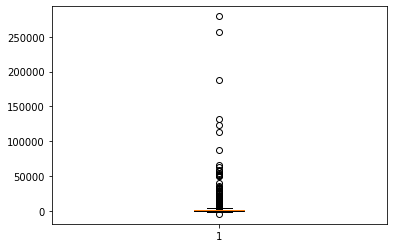

In [27]:
# outlier treatment for Amount
plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

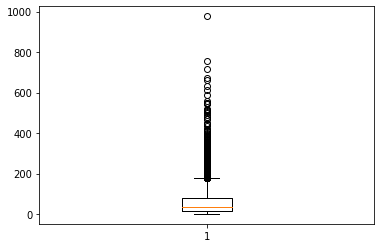

In [28]:
# outlier treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

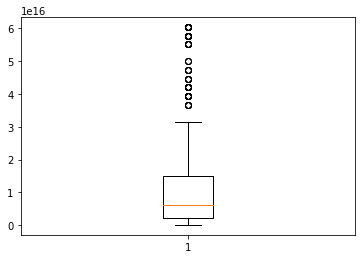

In [29]:
# outlier treatment for Recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [30]:
RFM.head(10)

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,327 days 07:02:00
2,12348.0,31,1797.24,77 days 04:06:00
3,12349.0,73,1757.55,20 days 07:28:00
4,12350.0,17,334.40,312 days 01:18:00
5,12352.0,95,1545.41,74 days 02:21:00
6,12353.0,4,89.00,205 days 23:32:00
7,12354.0,58,1079.40,234 days 04:08:00
8,12355.0,13,459.40,97 days 03:30:00
9,12356.0,59,2811.43,24 days 08:39:00
11,12358.0,19,1168.06,4 days 07:15:00


### Scaling the RFM data

In [31]:
# standardise all parameters
RFM_norm = RFM.drop("CustomerID", axis=1)
RFM_norm.Recency = RFM_norm.Recency.dt.days
RFM_norm.Recency.head(10)

0     327
2      77
3      20
4     312
5      74
6     205
7     234
8      97
9      24
11      4
Name: Recency, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm = standard_scaler.fit_transform(RFM_norm)

In [33]:
RFM_norm = pd.DataFrame(RFM_norm)
RFM_norm.columns = ['Frequency','Amount','Recency']
RFM_norm.head()

,Frequency,Amount,Recency
0,-1.082057,-1.055706,2.331764
1,-0.388758,1.365289,-0.285606
2,0.615331,1.311824,-0.882366
3,-0.723454,-0.605248,2.174722
4,1.141282,1.026058,-0.317014


# Hopkins Statistics:

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(RFM_norm)

0.8809150175741767

The value is 88%.So it will be a good cluster.

# K means algorithm

In [36]:
model_clus = KMeans(n_clusters = 5 , max_iter=50)
model_clus.fit(RFM_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

I choosed a random choosen cluster and fit with the dataset.But this is not a good idea,and also this will impect on the model.There is some tecnique to find the best no. of cluster for a dataset.

# Find the best Number of Cluster.

There are some tecniques for find the best number of cluster for a given dataset.In here i used 2 tecniques

1 . Silhouette Analysis

2 . Elbow Method.

### Silhouette Analysis

In [37]:
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm)
    sse_.append([k, silhouette_score(RFM_norm , kmeans.labels_)])

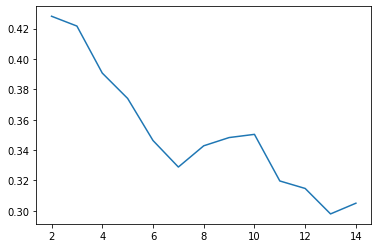

In [38]:
#plot the graph
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Elbow Method

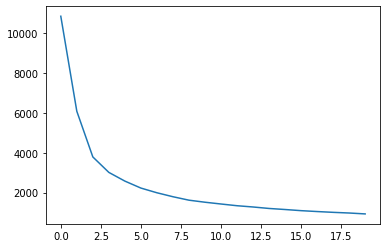

In [39]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters , max_iter=50)
    model_clus.fit(RFM_norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

From the upper graph it can be easily determined the no. of cluster shold be used.I consider 2,3 and 5 and see what happens to apply them.

## Applying different cluster.

### 2 Cluster

In [40]:
model_clus2 = KMeans(n_clusters = 2 , max_iter=50)
model_clus2.fit(RFM_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM , pd.Series(model_clus2.labels_)] , axis = 1)
RFM_km.columns = ['CustomerID' , 'Frequency' , 'Amount' , 'Recency' , 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [42]:
df = pd.concat([pd.Series([0 , 1]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,1639.835851,97.979343,47.146479
1,1,426.291130,26.087417,128.132105


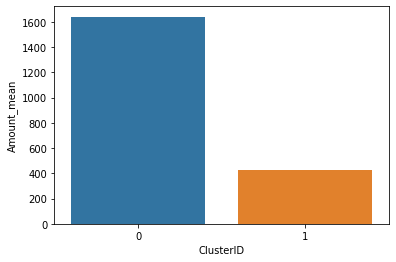

In [43]:
sns.barplot(x = df.ClusterID, y = df.Amount_mean)

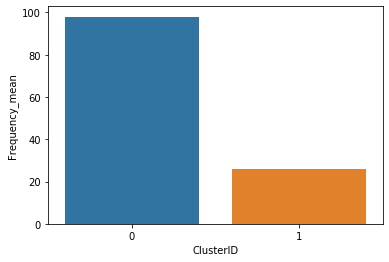

In [44]:
sns.barplot(x = df.ClusterID, y = df.Frequency_mean)

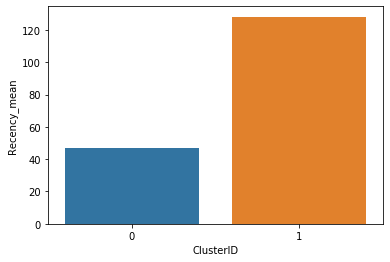

In [45]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

If from the graph Amount and frequency are high and recency is low then it can be said that those particular cluster or point is my desire CUSTOMER or for the company.

### 3 Cluster

In [46]:
model_clus3 = KMeans(n_clusters = 3 , max_iter=50 , n_jobs = -1)
model_clus3.fit(RFM_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM , pd.Series(model_clus3.labels_)] , axis = 1)
RFM_km.columns = ['CustomerID' , 'Frequency' , 'Amount' , 'Recency' , 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [48]:
df = pd.concat([pd.Series([0 , 1 , 2]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,565.986629,33.478614,55.953979
1,1,349.025847,23.920363,238.205645
2,2,1856.219963,109.823681,48.171171


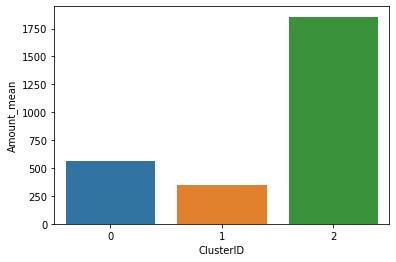

In [49]:
sns.barplot(x = df.ClusterID, y = df.Amount_mean)

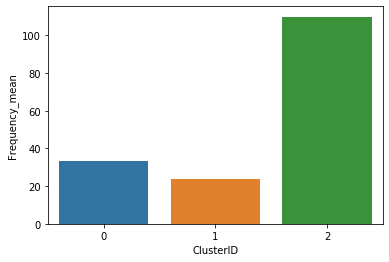

In [50]:
sns.barplot(x = df.ClusterID, y = df.Frequency_mean)

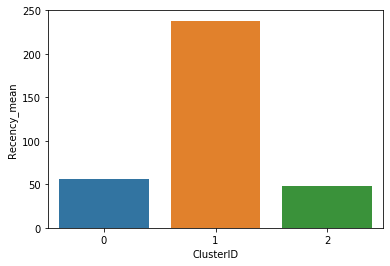

In [51]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

If from the graph Amount and frequency are high and recency is low then it can be said that those particular cluster or point is my desire CUSTOMER or for the company.

### 5 cluster

In [52]:
model_clus5 = KMeans(n_clusters = 5 , max_iter=50)
model_clus5.fit(RFM_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM , pd.Series(model_clus5.labels_)] , axis = 1)
RFM_km.columns = ['CustomerID' , 'Frequency' , 'Amount' , 'Recency' , 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [54]:
df = pd.concat([pd.Series([0 , 1 , 2 , 3 , 4]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,358.060823,22.758833,62.118280
1,1,1199.882420,53.613569,49.455752
2,2,923.442424,114.225895,65.741047
3,3,2475.376025,117.615804,45.782016
4,4,342.721611,22.390728,245.034216


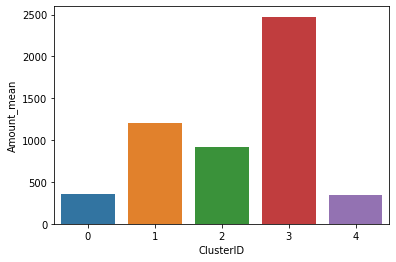

In [55]:
sns.barplot(x = df.ClusterID, y = df.Amount_mean)

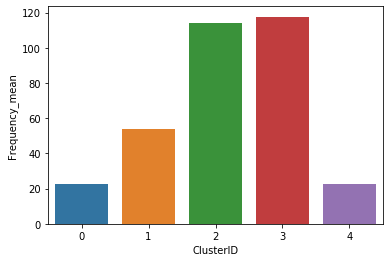

In [56]:
sns.barplot(x = df.ClusterID, y = df.Frequency_mean)

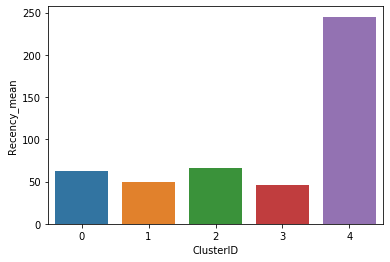

In [57]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

If from the graph Amount and frequency are high and recency is low then it can be said that those particular cluster or point is my desire CUSTOMER or for the company.

From the above graph it is clear that number '0' is my SPECIAL customer.Also number 2 is good customer.But rest of them are not so good.

# Hierarchical Clustering

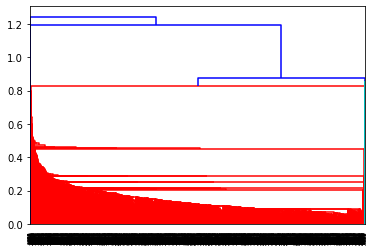

In [58]:
mergings = linkage(RFM_norm , method = "single" , metric='euclidean')
dendrogram(mergings)
plt.show()

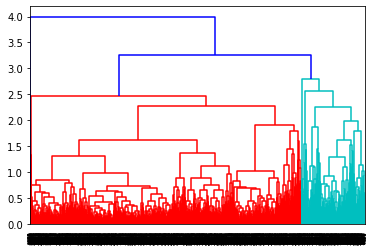

In [59]:
mergings_average = linkage(RFM_norm, method = "average", metric='euclidean')
dendrogram(mergings_average)
plt.show()

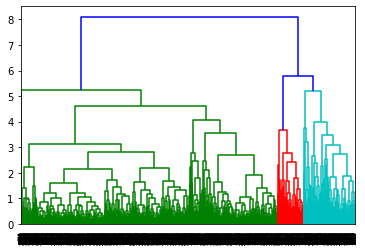

In [60]:
mergings_complete = linkage(RFM_norm, method = "complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

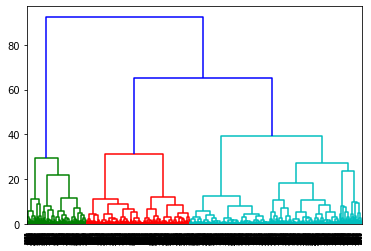

In [61]:
mergings_ward = linkage(RFM_norm , method = "ward", metric='euclidean')
dendrogram(mergings_ward)
plt.show()

### Apply different cluster with Average linkage

In [62]:
clusterCut = pd.Series(cut_tree(mergings_average , n_clusters = 2).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [63]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [64]:
df = pd.concat([pd.Series([0 , 1]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0.0,358.060823,22.758833,62.118280
1,1.0,1199.882420,53.613569,49.455752
2,NaN,923.442424,114.225895,65.741047
3,NaN,2475.376025,117.615804,45.782016
4,NaN,342.721611,22.390728,245.034216


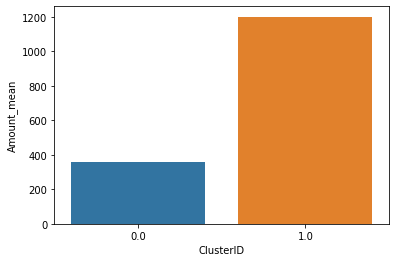

In [65]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

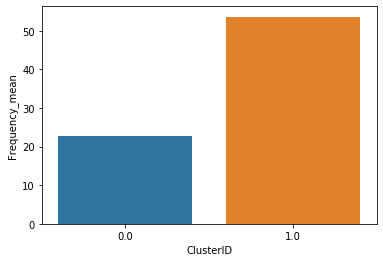

In [66]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

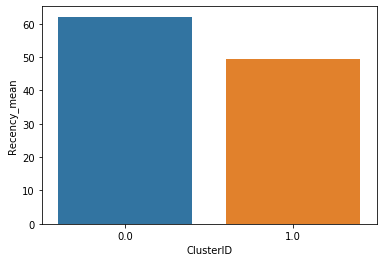

In [67]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [68]:
clusterCut3 = pd.Series(cut_tree(mergings_average , n_clusters = 3).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut3], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [69]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [70]:
df = pd.concat([pd.Series([0 , 1 , 2]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0.0,358.060823,22.758833,62.118280
1,1.0,1199.882420,53.613569,49.455752
2,2.0,923.442424,114.225895,65.741047
3,NaN,2475.376025,117.615804,45.782016
4,NaN,342.721611,22.390728,245.034216


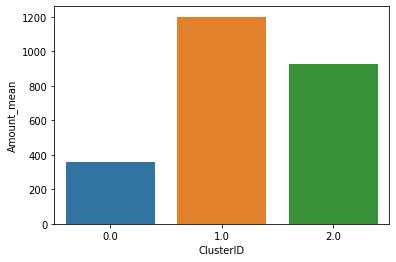

In [71]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

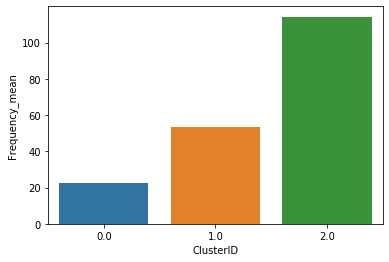

In [72]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

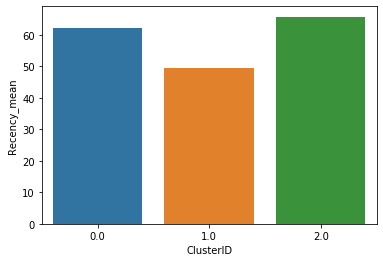

In [73]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [74]:
clusterCut5 = pd.Series(cut_tree(mergings_average , n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut5], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [75]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [76]:
df = pd.concat([pd.Series([0 , 1 , 2 , 3 , 4]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,358.060823,22.758833,62.118280
1,1,1199.882420,53.613569,49.455752
2,2,923.442424,114.225895,65.741047
3,3,2475.376025,117.615804,45.782016
4,4,342.721611,22.390728,245.034216


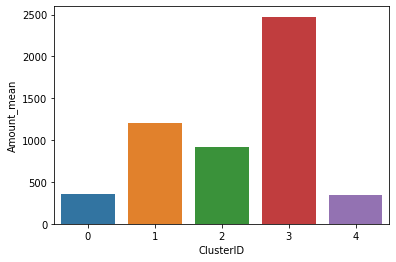

In [77]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

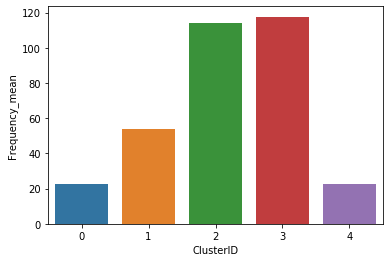

In [78]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

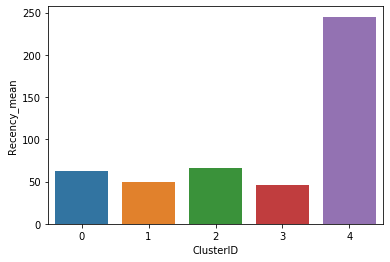

In [79]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

### Apply different cluster with Complete linkage

In [80]:
clusterCut2 = pd.Series(cut_tree(mergings_complete , n_clusters = 2).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut2], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [81]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [82]:
df = pd.concat([pd.Series([0 , 1]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0.0,358.060823,22.758833,62.118280
1,1.0,1199.882420,53.613569,49.455752
2,NaN,923.442424,114.225895,65.741047
3,NaN,2475.376025,117.615804,45.782016
4,NaN,342.721611,22.390728,245.034216


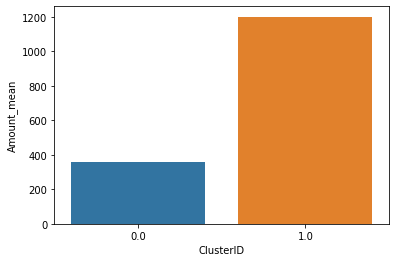

In [83]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

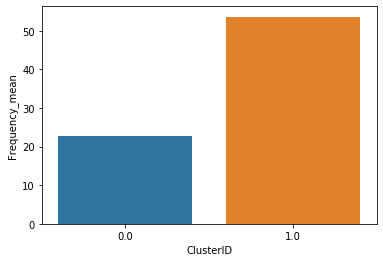

In [84]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

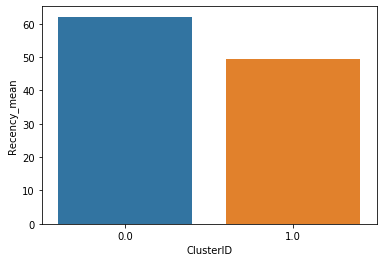

In [85]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [86]:
clusterCut3 = pd.Series(cut_tree(mergings_complete , n_clusters = 3).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut3], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [87]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [88]:
df = pd.concat([pd.Series([0 , 1 , 2]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0.0,358.060823,22.758833,62.118280
1,1.0,1199.882420,53.613569,49.455752
2,2.0,923.442424,114.225895,65.741047
3,NaN,2475.376025,117.615804,45.782016
4,NaN,342.721611,22.390728,245.034216


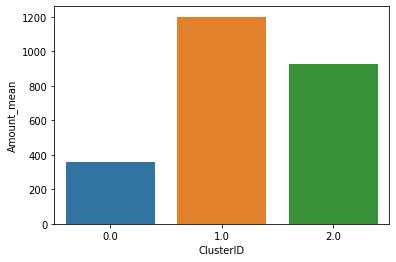

In [89]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

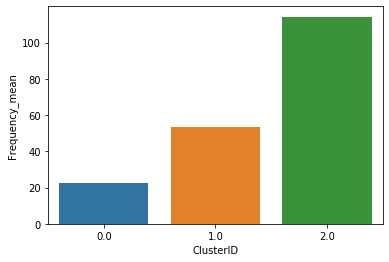

In [90]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

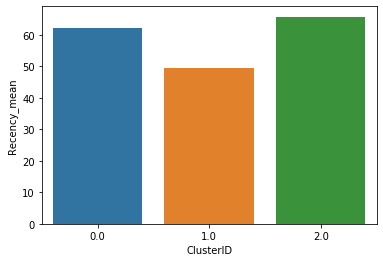

In [91]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [92]:
clusterCut5 = pd.Series(cut_tree(mergings_complete , n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut5], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [93]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [94]:
df = pd.concat([pd.Series([0 , 1 , 2 ,3 , 4]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,358.060823,22.758833,62.118280
1,1,1199.882420,53.613569,49.455752
2,2,923.442424,114.225895,65.741047
3,3,2475.376025,117.615804,45.782016
4,4,342.721611,22.390728,245.034216


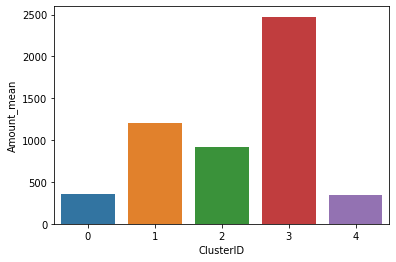

In [95]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

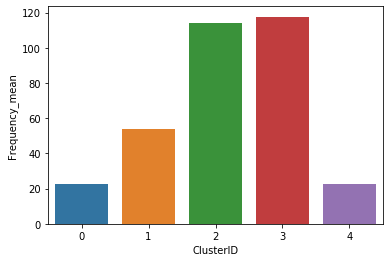

In [96]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

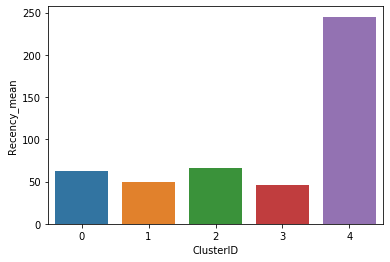

In [97]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

### Apply different cluster with Ward linkage

In [98]:
clusterCut2 = pd.Series(cut_tree(mergings_complete , n_clusters = 2).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut2], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [99]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [100]:
df = pd.concat([pd.Series([0 , 1]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0.0,358.060823,22.758833,62.118280
1,1.0,1199.882420,53.613569,49.455752
2,NaN,923.442424,114.225895,65.741047
3,NaN,2475.376025,117.615804,45.782016
4,NaN,342.721611,22.390728,245.034216


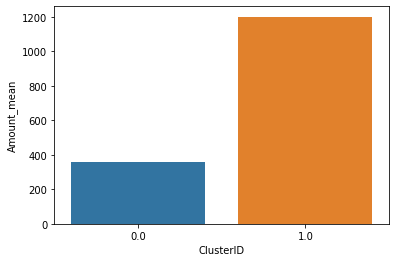

In [101]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

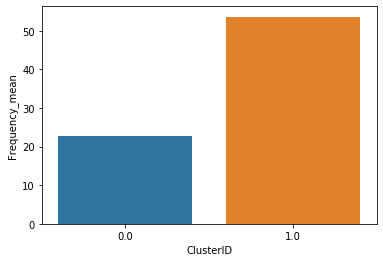

In [102]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

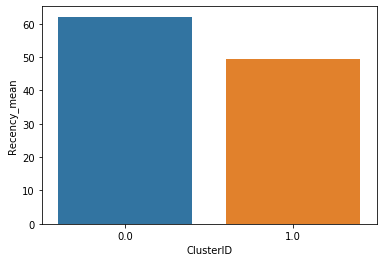

In [103]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [104]:
clusterCut3 = pd.Series(cut_tree(mergings_complete , n_clusters = 3).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut3], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [105]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [106]:
df = pd.concat([pd.Series([0 , 1 , 2]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0.0,358.060823,22.758833,62.118280
1,1.0,1199.882420,53.613569,49.455752
2,2.0,923.442424,114.225895,65.741047
3,NaN,2475.376025,117.615804,45.782016
4,NaN,342.721611,22.390728,245.034216


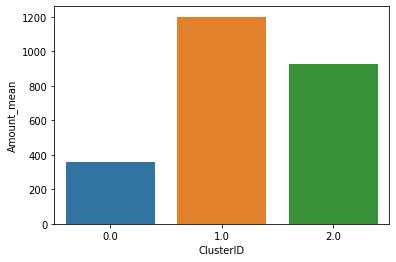

In [107]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

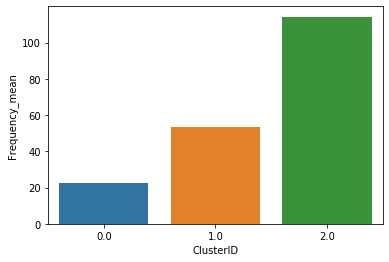

In [108]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

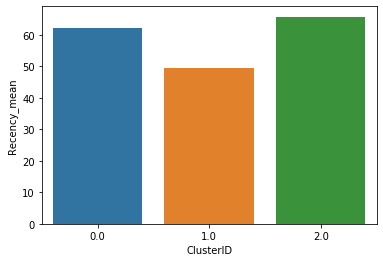

In [109]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [110]:
clusterCut5 = pd.Series(cut_tree(mergings_complete , n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([RFM , clusterCut5], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [111]:
RFM_km.Recency = RFM_hc.Recency.dt.days
cluster_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
cluster_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
cluster_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [112]:
df = pd.concat([pd.Series([0 , 1 , 2 , 3 , 4]) , cluster_amount , cluster_frequency , cluster_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,358.060823,22.758833,62.118280
1,1,1199.882420,53.613569,49.455752
2,2,923.442424,114.225895,65.741047
3,3,2475.376025,117.615804,45.782016
4,4,342.721611,22.390728,245.034216


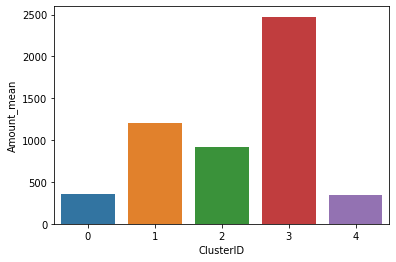

In [113]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

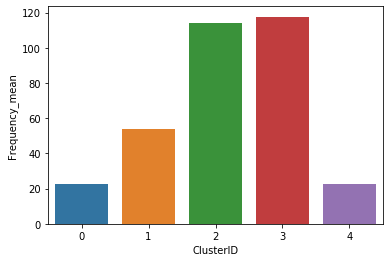

In [114]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

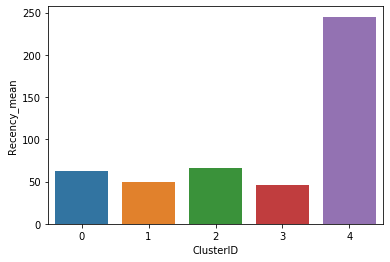

In [115]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

# Summary

The main concept of this project is find out the best customer for a particular company.From differenct algorithm,different cluster amount and also different linkage have shown some answer.
Whatever the answer is the main concept to find the answer is Amoun+Frequency must be high and Recency must be low.

Consider 5 cluster as input the best customer is in '3' class.